In [3]:
#1 часть
import numpy as np # линейная алгебра
import pandas as pd # обработка данных


# Файлы входных данных доступны только для чтения каталоге "../input/"

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Устанавливаем параметры для работы в формате float
pd.options.display.float_format = '{:20,.0f}'.format

ds = pd.read_csv("/Users/HOME/Desktop/code/Top Youtubers Dataset.csv",sep=",",index_col='Rank',encoding='cp1252')

def no(): 
    return null

print(ds)

                                           Youtuber  Subscribers  \
Rank                                                               
1                                           MrBeast    284000000   
2                                          T-Series    268000000   
3                                    YouTube Movies    181000000   
4                        Cocomelon - Nursery Rhymes    177000000   
5                                         SET India    174000000   
...                                             ...          ...   
996   Peppa Pig em Português Brasil - Canal Oficial     14500000   
997                                     Bie The Ska     14500000   
998                                         Cyprien     14500000   
999                                   YANA CHIRKINA     14500000   
1000         Tayo Bus Kecil - Tayo Bahasa Indonesia     14500000   

              Video Views  Video Count          Category  Started  
Rank                                           

In [2]:
#2 часть
ds["Views Per Video"] = (
    ds["Video Views"] / ds["Video Count"]
)
ds

ds = ds[ds['Video Count'] != 0] #Фильтры настроены так, чтобы исключить каналы с 0 видео

ds = ds[ds['Started'] > 2000 ] #Фильтруем данные за период с 200 года

    
ds = ds.reset_index() #Создаем индекс (добавляем к нему 1), чтобы мы могли найти по индексу в списке


ds["Rank Delta"] = (
    ds["Rank"] - ds.index.to_numpy()   #Создаем показатель разности между старыми и новыми ранками
)

ds

year_started_counts = ds.Started.value_counts() #Создаем новую серию, для графика учитывается начатый год
print(year_started_counts) 

rank_delta_counts = ds.value_counts("Rank Delta") #Создаем новую серию, для графика учитывается начатый год
print(rank_delta_counts)

Started
2014    100
2015     83
2016     77
2013     74
2011     73
2017     72
2012     70
2006     60
2018     53
2021     53
2009     47
2020     47
2008     41
2007     38
2019     36
2010     35
2005     18
2022      7
2023      5
2024      1
Name: count, dtype: int64
Rank Delta
10    395
11    193
8     125
7      99
5      93
6      35
9      31
3       7
4       7
2       3
1       2
Name: count, dtype: int64


Category
Entertainment            269
Music                    172
People & Blogs           152
Gaming                    92
Comedy                    71
Film & Animation          44
Education                 41
Howto & Style             28
News & Politics           27
Sports                    17
Science & Technology      15
Shows                     13
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           2
Name: count, dtype: int64
                           Views Per Video
Category                                  
Autos & Vehicles                 5,902,920
Comedy                          16,151,198
Education                       42,429,184
Entertainment                   11,100,706
Film & Animation                22,004,196
Gaming                           5,825,053
Howto & Style                    7,030,186
Movies                           2,182,529
Music                           71,668,449

<Axes: xlabel='Category', ylabel='Views (Ten-Millions)'>

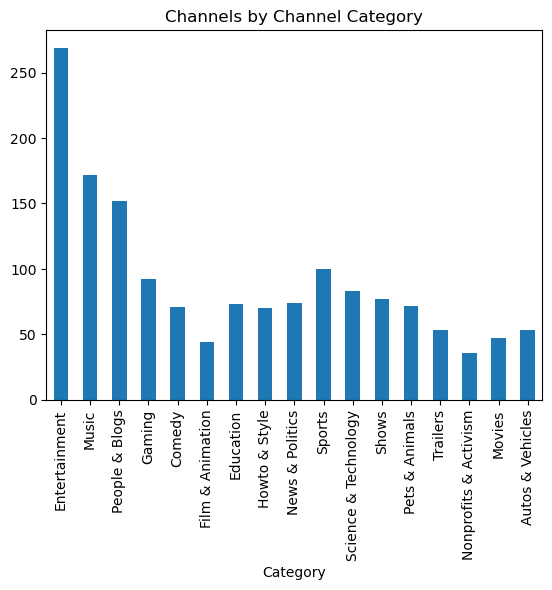

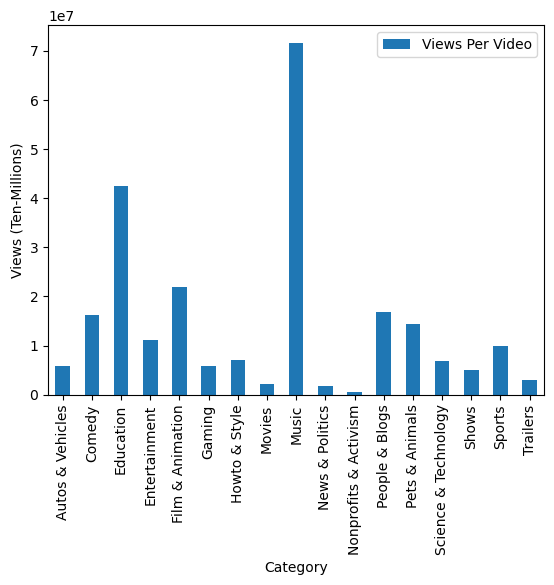

In [3]:
#3 часть
# Сортируем серии, чтобы они располагались в хронологическом порядке
year_started_counts = year_started_counts.sort_index()
ys_graph = year_started_counts.plot(kind='bar',title ="Number of Top 1000 Channels Started by Year") #Сохраняем график, на всякий случай

#Категория доступа подсчитывается в значении value_counts и показывается в диаграмме
category_counts = ds.Category.value_counts()
print(category_counts)
category_graph = category_counts.plot(kind='bar', title = 'Channels by Channel Category')

cat_view_p_vid = ds.groupby(['Category'])[["Views Per Video"]].mean()
print(cat_view_p_vid)
cat_view_p_vid.plot(kind = 'bar', ylabel="Views (Ten-Millions)")

In [2]:
import pandas as pd
df = pd.read_csv("/Users/HOME/Desktop/code/Top Youtubers Dataset.csv",sep=",",index_col='Rank',encoding='cp1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Youtuber     1000 non-null   object 
 1   Subscribers  1000 non-null   int64  
 2   Video Views  1000 non-null   float64
 3   Video Count  1000 non-null   int64  
 4   Category     957 non-null    object 
 5   Started      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 54.7+ KB


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/Users/HOME/Desktop/code/Top Youtubers Dataset.csv",sep=",",index_col='Rank',encoding='cp1252')

df['Category'].fillna(df['Category'].mode()[0], inplace=True)

# Преобразование категориальной переменной 'Category' в числовую
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Нормализация числовых признаков
scaler = StandardScaler()
numerical_features = ['Subscribers', 'Video Views', 'Video Count']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

ImportError: numpy._core.multiarray failed to import